# <u>Chapter 3: Introduction to your Kepler science lightcurve</u>

<div class="alert alert-block alert-info">

### This Notebook will give you the tools to:

- open Kepler science lighcurves
- understand data structure in fits files
- understand basic features of data
- start with fitting your dataset

### What you should achieve:

- plot and inspect data
- identify transits
- make a plan for modelling

### What's next:
after you have completed this notebook:

- perform detailed modelling of your data
- write up the summary of your modelling
- collect your results for the comparison with other datasets
    
### Table of contents:
    
- [1. Reading Kepler data](#sec:keplerdata)
- [2. Step by step guide to your data](#sec:dataguide)
- [Summary](#sec:summary)

<div class="alert alert-block alert-warning">
    
<b>Make sure to edit the box below to match your assigned object number.</b>

In [62]:
#Necessary imports
from astropy.io import fits #used to open fits files in which data are stored
import matplotlib.pyplot as plt #plotting
import glob
#add here the source number assigned to you, '1' (Team Osiris) or '2' (Team Dagon)
#Check Moodle to see which object has been assigned to you
mykepler = '1' 

<a id="sec:keplerdata"></a>
## 1. Reading Kepler data

First, we will have a look at the dataset, we have given you the fits dataset exactly as provided by Kepler, you can download additional datasets [on the Kepler archive](https://archive.stsci.edu/kepler/). We have though made the header anonymous so you cannot see which source you are working with. 

In [63]:
#Fits files are open like this:
lc = fits.open('Data/Object%slc/kplr%s_1.fits'%(mykepler, mykepler))

Fits files are common in astrophysics, they have different extensions, which can be images or tables. The information discribing the data is stored in the header.

In [64]:
lc

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fe0b713ce50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fe0ca190a90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe0cb363d30>]

In [65]:
#The header for the first extension can be accesses like this:
lc[0].header
#It contains basic information about the object (some of those removed here)

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-09'         / file creation date.                            
CREATOR = '826630 FluxExporter2PipelineModule' / pipeline job and program used t
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.22 r60269' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

**You will see some of the header keywords to read 'None of your business', this is because we have anonymized the dataset for you. 

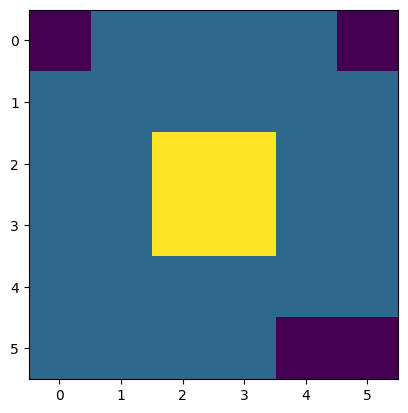

In [66]:
#The last extension holds a small image of the source:
plt.imshow(lc[2].data)

In [67]:
#It also has a header that gives more information
lc[2].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    6 / length of first array dimension                
NAXIS2  =                    6 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'APERTURE'           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
TELESCOP= 'Kepler  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
OBJECT  = 'None of your busi

In [68]:
#lets have a look at the second extension
lc[1]
#This is a table extension

In [69]:
#Here the beginning has a description of columns in the table, including the units
lc[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4370 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

This is our lightcirve extension. You will notice two lighcurves here. "SAP_FLUX" is the Simple Aperture Photometry, whereas "PDCSAP_FLUX" is Pre-search Data Condictioned, i.e. has had processing applied for calibration. 

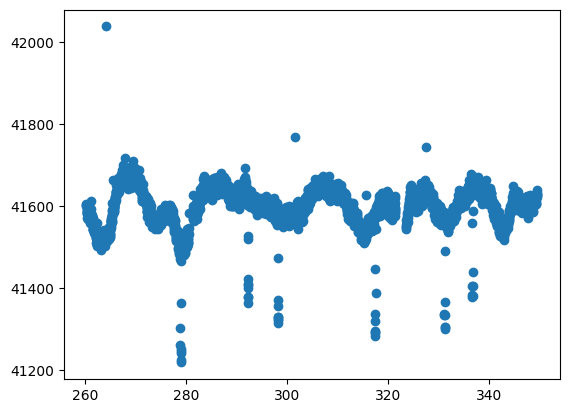

In [70]:
#Lets plot the lightcurve, you can plot the time and flux:
plt.plot(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], ls='None', marker='o')
#This plots the barycentre time and flux in e/s

<ErrorbarContainer object of 3 artists>

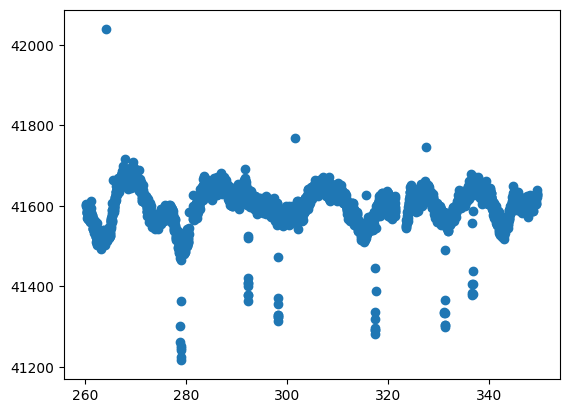

In [71]:
#Measurements errors are also included, you can plot them as follows
plt.errorbar(lc[1].data['TIME'], lc[1].data['PDCSAP_FLUX'], lc[1].data['PDCSAP_FLUX_ERR'], ls='None', marker='o')
#We'll need to zoom in to see them:

<a id="sec:dataguide"></a>
## 2. Step by step guide to your data

#### Do not panic (or maybe do), what you have seen so far is only a small subset of the data you will be working with.

<div class="alert alert-block alert-success">
    
### Your turn: First look at data - signal-to-noise

- calculate the signal to noise of your lightcurve. Compare it to the signal-to-noise you required to detect a trsnait in Chapter 1. You can also compare it to some of the aperture photometry in Chapter 2.

<div class="alert alert-block alert-success">
    
### Your turn: First look at data - What does your lightcurve look like?

Make notes about your lightcurve: you will be fitting this for planets, do you see any complications?

<div class="alert alert-block alert-success">
    
### Your turn: Preparing for fitting:

Locate all transits and make a plot for each

In [72]:
## So far, we have only looked at a subset of the data, the full dataset is stored in the Data folder.
glob.glob('Data/Object%slc/kplr*.fits'%(mykepler)) #Lists all your lightcurve files

['Data/Object1lc/kplr1_17.fits',
 'Data/Object1lc/kplr1_8.fits',
 'Data/Object1lc/kplr1_12.fits',
 'Data/Object1lc/kplr1_5.fits',
 'Data/Object1lc/kplr1_15.fits',
 'Data/Object1lc/kplr1_2.fits',
 'Data/Object1lc/kplr1_3.fits',
 'Data/Object1lc/kplr1_9.fits',
 'Data/Object1lc/kplr1_10.fits',
 'Data/Object1lc/kplr1_7.fits',
 'Data/Object1lc/kplr1_11.fits',
 'Data/Object1lc/kplr1_13.fits',
 'Data/Object1lc/kplr1_6.fits',
 'Data/Object1lc/kplr1_16.fits',
 'Data/Object1lc/kplr1_14.fits',
 'Data/Object1lc/kplr1_1.fits',
 'Data/Object1lc/kplr1_4.fits']

<div class="alert alert-block alert-success">

### Your turn: plot the full lightcurve

In [73]:
import numpy as np
import tqdm

In [74]:
#THis works....
total_flux, total_time, total_flux_error = [], [], []

for lcfile in glob.glob('Data/Object%slc/kplr*.fits' %(mykepler)):
    tmp = fits.open(lcfile)
    tmptime = (tmp[1].data['TIME'])
    tmpflux = (tmp[1].data['PDCSAP_FLUX'])
    tmperror = (tmp[1].data['PDCSAP_FLUX_ERR'])

    tmpflux_mask, tmperror_mask  = np.isfinite(tmpflux), np.isfinite(tmperror)
    total_mask = np.logical_and(tmpflux_mask, tmperror_mask)

    time_sample, flux_sample, flux_sample_error = tmptime[total_mask], tmpflux[total_mask], tmpflux[total_mask]
    normalized_flux, normalized_flux_error = (flux_sample / np.mean(flux_sample)), (flux_sample_error / np.mean(flux_sample))


    from scipy.signal import savgol_filter
    interp_savgol = savgol_filter(normalized_flux, window_length=271, polyorder=3)


    total_flux.append(normalized_flux/ interp_savgol)
    total_flux_error.append(normalized_flux_error / interp_savgol)
    total_time.append(time_sample)

    #Mask all fluxes above upper value of 1 sigma of mean 
    tmp.close()

In [75]:
#Quick correction to get one array for flux, flux_err and time sorted in order. 
flux_arr = np.concatenate(total_flux)
flux_error_arr = np.concatenate(total_flux_error)
time_arr = np.concatenate(total_time)

sorted_flux = np.array([x for _, x in sorted(zip(time_arr, flux_arr), key=lambda pair: pair[0])])
sorted_time = np.array([_ for _, x in sorted(zip(time_arr, flux_arr), key=lambda pair: pair[0])])
sorted_flux_err = np.array([x for _, x in sorted(zip(time_arr, flux_error_arr), key=lambda pair: pair[0])])

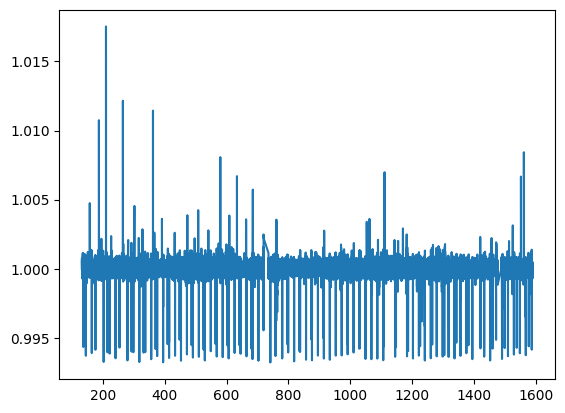

In [76]:
plt.plot(sorted_time, sorted_flux)

In [77]:
#Remove all above x sigma above mean to clean signal 
num_sigma = 2 
num_sigma_above_mean = np.mean(sorted_flux) + num_sigma * (np.std(sorted_flux))

flux_value_mask = [x < num_sigma_above_mean for x in sorted_flux]
flux, flux_err, time = sorted_flux[flux_value_mask], sorted_flux_err[flux_value_mask], sorted_time[flux_value_mask]

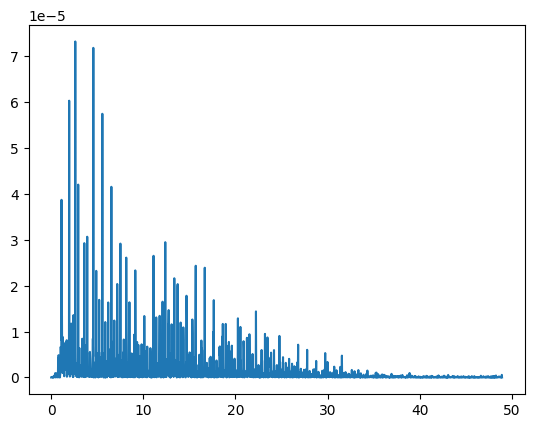

In [78]:
#time_arr
dt = time_arr[1] - time_arr[0]
T = time_arr[-1] - time_arr[0]

import scipy.signal
from scipy.signal import lombscargle
freqs = np.linspace((1/T),(1/dt), 2000)
lomb = scipy.signal.lombscargle(time_arr, flux_arr, freqs, precenter=True)

plt.plot(freqs, lomb)

In [79]:
period = np.argmax(lomb)
print(f"the maximal period is {period}")

the maximal period is 107


the final found period is 761


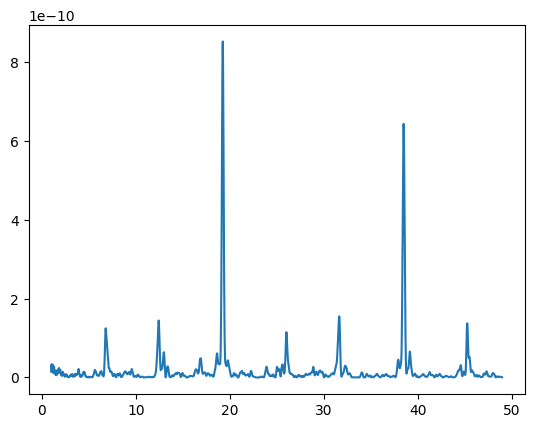

In [115]:
period = np.linspace(1, freqs[-1], 2000)
lomb2 = lombscargle(freqs, lomb, period, precenter = True)

plt.plot(period, lomb2)

period_final = np.argmax(lomb2)
print(f"the final found period is {period_final}")

In [155]:
def model_curve(x, d, transit_b, transit_e) -> float: 
    """
    """
    m = (16 * (1-d) / (transit_e - transit_b)**4) * (x - (transit_e+transit_b) / 2)**4 + d
    return m

In [141]:
periods_found_from_lomb = [19.221, 38.433512752318606]

In [210]:
import pandas as pd 
from typing import Optional

def fold_lightcurven(time, flux, error, period, found_phase : Optional[float] = 0.545,  verbose : bool = False):
    """
    Folds the lightcurve given a period.
    time: input time (same unit as period)
    flux: input flux
    error: input error
    period: period to be folded to, needs to same unit as time (i.e. days)
    returns: phase, folded flux, folded error
    """
    #Create a pandats dataframe from the 
    data = pd.DataFrame({'time': time, 'flux': flux, 'error': error})
    #create the phase 
    data['phase'] = data.apply(lambda x: ((x.time/ period) - np.floor(x.time / period)), axis=1)
    time_to_return = data.iloc[(data['phase']-found_phase).abs().argsort()[:10]]

    print(time_to_return)

    if verbose: 
        print(data.head(10))

    #Creates the out phase, flux and error
    phase_long = np.concatenate((data['phase'], data['phase'] + 1.0, data['phase'] + 2.0))
    flux_long = np.concatenate((flux, flux, flux))
    err_long = np.concatenate((error, error, error))
    
    return(data['time'], phase_long, flux_long, err_long, time_to_return)



In [211]:
#from utils import fold_lightcurve


time_final, p_final, pflux_final, pflux_error_final, found_time = fold_lightcurven(
                                            time.tolist(), 
                                            flux.tolist(), 
                                            flux_err.tolist(), 
                                            periods_found_from_lomb[1]
    )

area_mask = (p_final < 1.598) & (p_final > 1.589) & (pflux_final < 0.9985)
plot_mask = (p_final < 1.7) & (p_final > 1.5) 
tester = model_curve(p_final[area_mask], 0.994, 1.589, 1.598)


              time      flux     error     phase
13927   443.715253  1.000722  1.000722  0.545009
30880   828.051375  0.999958  0.999958  0.545035
46595  1173.950257  0.999848  0.999848  0.544964
29322   789.614302  0.999772  0.999772  0.544942
48402  1212.387502  0.999890  0.999890  0.545061
12130   405.278447  1.000265  1.000265  0.544923
61583  1519.849489  0.999778  0.999778  0.544902
15722   482.152646  0.999445  0.999445  0.545110
44997  1135.513801  1.000744  1.000744  0.544887
27639   751.178233  0.999992  0.999992  0.544876


In [202]:
found_time

62355    1537.341066
12974     422.770040
47396    1191.442087
64147    1575.778182
14773     461.207202
Name: time, dtype: float64

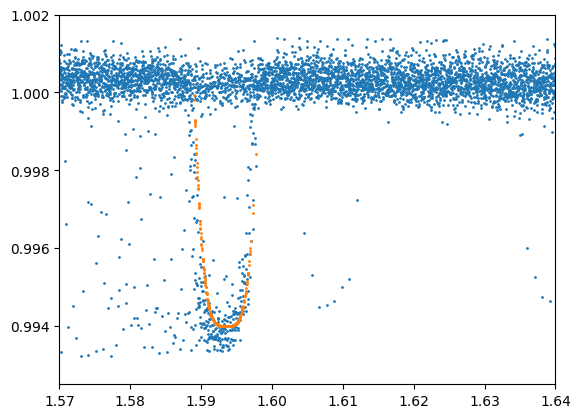

In [159]:
plt.plot(p_final[plot_mask], pflux_final[plot_mask], ls="None", marker="o", ms=1)#ls = 'none')
plt.plot(p_final[area_mask], tester, ls="None", marker="o", ms=1)#ls = 'none')

plt.xlim(1.57, 1.64)
plt.ylim(0.9925, 1.002)
plt.show()

In [234]:
from utils import fold_lightcurve
time_final, p_final, pflux_final, pflux_error_final = fold_lightcurve(
                                            time.tolist(), 
                                            flux.tolist(), 
                                            flux_err.tolist(), 
                                            periods_found_from_lomb[1]
    )

area_mask = (p_final < 0.55) & (p_final > 0.53) & (pflux_final < 0.998)
plot_mask = (p_final < 1.7) & (p_final > 1.5) 
tester = model_curve(p_final[area_mask], 0.9945, 0.544, 0.550)
    


         time      flux     error     phase
0  131.513013  1.000528  1.000528  0.421832
1  131.533448  1.000294  1.000294  0.422363
2  131.553882  1.000422  1.000422  0.422895
3  131.574316  1.000147  1.000147  0.423427
4  131.594751  1.000558  1.000558  0.423958
5  131.615186  1.000769  1.000769  0.424490
6  131.635620  1.000768  1.000768  0.425022
7  131.656054  0.999919  0.999919  0.425554
8  131.676489  1.000385  1.000385  0.426085
9  131.696923  1.000438  1.000438  0.426617


(0.54, 0.58)

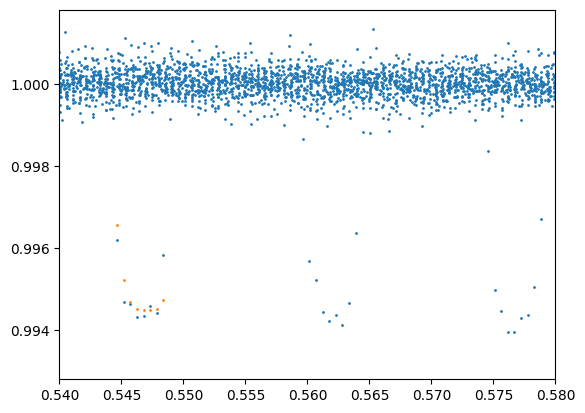

In [235]:
plt.plot(p_final, pflux_final, ls="None", marker="o", ms=1)#ls = 'none')
plt.plot(p_final[area_mask], tester, ls="None", marker="o", ms=1)#ls = 'none')

plt.xlim(0.54, 0.58)
#plt.ylim(0.9925, 1.002)
#plt.show()

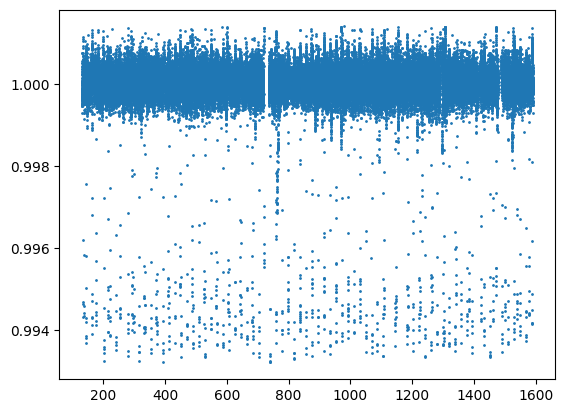

In [186]:
plt.plot(time, flux, ls="None", marker="o", ms=1)#ls = 'none')
#plt.xlim(0.54, 0.54)
plt.show()

In [145]:
import pymc3_ext as pmx

np.random.seed(123)
periods = np.random.uniform(5, 20, 2)
t0s = periods * np.random.rand(2)
t = np.arange(0, 80, 0.02)
yerr = 5e-4

In [ ]:
import arviz as az
import aesara_theano_fallback.tensor as tt
import exoplanet as xo
import pymc3 as pm


random = np.random.default_rng(123)
num_transits = 4
t = np.arange(0, 35, 0.02)
yerr = 5e-4

with pm.Model():

    # The baseline flux
    mean = pm.Normal("mean", mu=0.0, sigma=1.0)

    # Often the best parameterization is actually in terms of the
    # times of two reference transits rather than t0 and period
    t0 = pm.Normal("t0", mu=4.35, sigma=1.0)
    t1 = pm.Normal("t1", mu=33.2, sigma=1.0)
    period = pm.Deterministic("period", (t1 - t0) / num_transits)

    # The Kipping (2013) parameterization for quadratic limb darkening
    # paramters
    u = xo.distributions.QuadLimbDark("u", testval=np.array([0.3, 0.2]))

    # The radius ratio and impact parameter; these parameters can
    # introduce pretty serious covariances and are ripe for
    # reparameterization
    log_r = pm.Normal("log_r", mu=np.log(0.04), sigma=2.0)
    r = pm.Deterministic("r", tt.exp(log_r))
    b = xo.distributions.ImpactParameter("b", ror=r, testval=0.35)

    # Set up a Keplerian orbit for the planets
    orbit = xo.orbits.KeplerianOrbit(period=period, t0=t0, b=b)

    # Compute the model light curve; note that we index using `[:, 0]`
    # since `get_light_curve` returns an object with the shape
    # `(n_times, n_planets)`
    light_curve = (
        xo.LimbDarkLightCurve(u[0], u[1]).get_light_curve(
            orbit=orbit, r=r, t=time
        )[:, 0]
        + mean
    )

    # Here we track the value of the model light curve for plotting
    # purposes
    pm.Deterministic("light_curve", light_curve)


    # The likelihood function assuming known Gaussian uncertainty
    pm.Normal("obs", mu=light_curve, sd=yerr, observed=flux)

    trace = pmx.sample(
        tune=1000,
        draws=1000,
        cores=2,
        chains=2,
        return_inferencedata=True,
    )
print("done")
# Plot the results
q16, q50, q84 = np.percentile(
    trace.posterior["light_curve"].values, [16, 50, 84], axis=(0, 1)
)
plt.plot(t, y, ".k", ms=2, label="data")
plt.plot(t, q50)
plt.fill_between(t, q16, q84, alpha=0.3, label="posterior")
plt.xlim(0.0, 35)
plt.legend(fontsize=12, loc=3)
plt.xlabel("time [days]")
plt.ylabel("relative flux")

# Compute the convergence stats
az.summary(trace, var_names=["^(?!light_curve).*"], filter_vars="regex")


In [ ]:
scipy.__version__

In [ ]:
import scipy.signal
from scipy.signal import lombscargle

freqs = np.linspace((1/45.),(1/0.007), 1000)
lomb = scipy.signal.lombscargle(45, 0.007, freqs, precenter=True)

In [ ]:
plt.plot(freqs, lomb)
plt.xlabel('Frequency [1/d]')
plt.ylabel('Power')